<a href="https://colab.research.google.com/github/wsno1-lim/DF-AI2team/blob/main/2.%EC%84%A4%EA%B3%84/5.time_series/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90%EC%A3%BC%EA%B0%80_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
start_date='2013-01-01'
end_date='2020-12-31'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]

In [65]:
#!pip install yfinance
#!pip install investpy
#!pip install pykrx
#!pip install sorted_months_weekdays
#!pip install sort_dataframeby_monthorweek
#!pip install chart_studio
#!pip install FinanceDataReader

In [117]:
# 지난번 EDA로 검증한 연관성있는 데이터만 수집한다

# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# S&P 500
snp_500_ = yf.download("^GSPC", start=start_date, end=end_date)
snp_500_.columns = ['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Close','snp_500_Adj Close','snp_500_Volume']
snp_500_ = snp_500_.drop(['snp_500_Open','snp_500_High','snp_500_Low','snp_500_Adj Close','snp_500_Volume'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# HANG SENG
hang_seng_ = yf.download("^HSI", start=start_date, end=end_date)
hang_seng_.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng_ = hang_seng_.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# SOX 지수 엔비디아(8.9%), 텍사스인스트루먼트(8.6%), 퀄컴(7.7%), 인텔(7.4%) 반도체장비기업 18.52%
SOXX = yf.download("SOXX", start=start_date, end=end_date)
SOXX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOXX = SOXX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

# SMH 인텔(10%), TSMC(10%), 엔비디아(5%)
SMH = yf.download("SMH", start=start_date, end=end_date)
SMH.columns = ['SMH_Open','SMH_High','SMH_Low','SMH_Close','SMH_Adj Close','SMH_Volume']
SMH = SMH.drop(['SMH_Open','SMH_High','SMH_Low','SMH_Close','SMH_Volume'], axis=1)

# SOXL 지수(3배 상승 레버리지) 텍사스인스트루먼트(8.6%) 인텔(8.3%), 퀄컴(7.8%), 엔비디아(7.8%)
SOXL = yf.download("SOXL", start=start_date, end=end_date)
SOXL.columns = ['SOXL_Open','SOXL_High','SOXL_Low','SOXL_Close','SOXL_Adj Close','SOXL_Volume']
SOXL = SOXL.drop(['SOXL_Open','SOXL_High','SOXL_Low','SOXL_Close','SOXL_Volume'], axis=1)

# SOXS 지수(3배 인버스 레버리지) 텍사스인스트루먼트(8.6%) 인텔(8.3%), 퀄컴(7.8%), 엔비디아(7.8%)
SOXS = yf.download("SOXS", start=start_date, end=end_date)
SOXS.columns = ['SOXS_Open','SOXS_High','SOXS_Low','SOXS_Close','SOXS_Adj Close','SOXS_Volume']
SOXS = SOXS.drop(['SOXS_Open','SOXS_High','SOXS_Low','SOXS_Close','SOXS_Volume'], axis=1)

model_samsung['US'] = exchange_rate_usd_
model_samsung['SNP500'] = snp_500_
model_samsung['SOXX'] = SOXX
model_samsung['SMH'] = SMH
model_samsung['SOXL'] = SOXL
model_samsung['SOXS'] = SOXS
model_samsung['TREASURY_5Y']=treasury_5y_
model_samsung['hang_seng'] = hang_seng_

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [118]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거
model_samsung = model_samsung.drop(['Open','High','Low','Volume'],axis=1)

In [119]:
# 차트 비교분석을 위한 정규화 (SKIP - 필요없음)
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#fitted = min_max_scaler.fit(model_samsung)
#output = min_max_scaler.transform(model_samsung)
#output = pd.DataFrame(output, columns=model_samsung.columns, index=list(model_samsung.index.values))
#print(output.head())

In [120]:
#필요없는 열 제거
cols = ['US','SNP500','SOXX','SMH','SOXL','SOXS','TREASURY_5Y','hang_seng']
model_samsung.drop(cols, axis=1, inplace=True)

In [121]:
model_samsung.isnull().sum()

Close    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



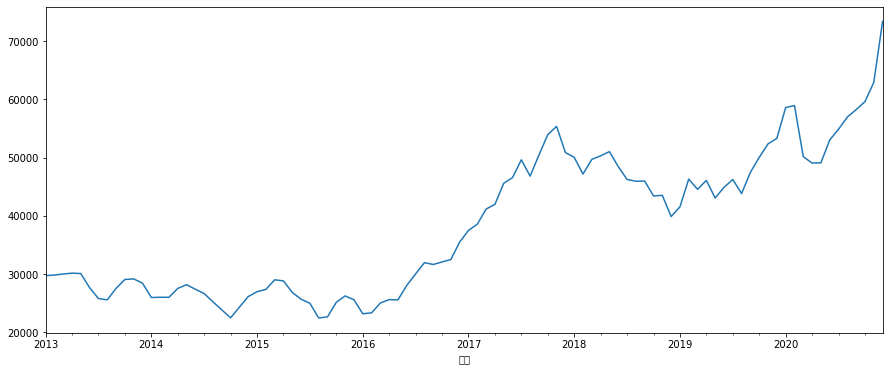

In [122]:
#MS는인덱스는 해당 월의 초일자로 표시를 시작일로 변경
y = model_samsung['Close'].resample('MS').mean()
# 초일자 기준 변화를 본다
y.plot(figsize = (15,6))
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



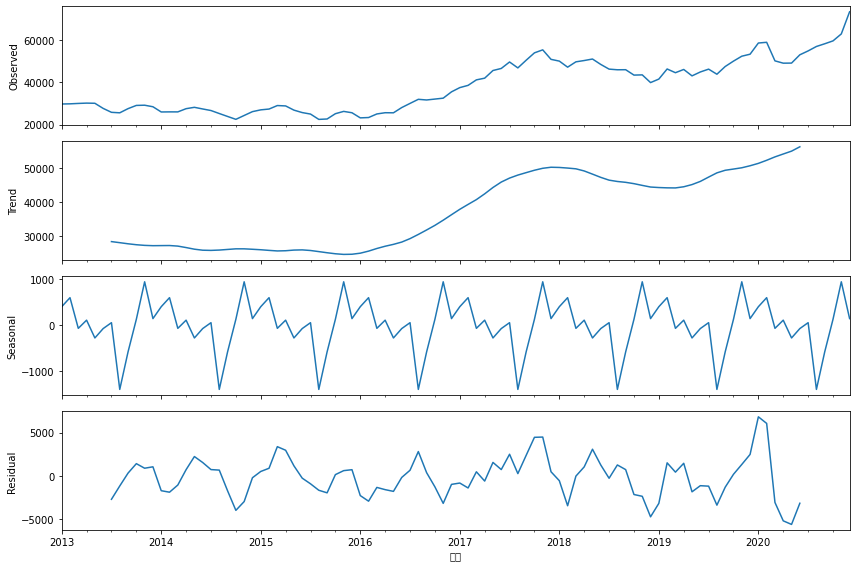

In [123]:
# Visualizing Furniture Sales Time Series Data
import statsmodels.api as sm #통계분석 기능을 제공하는 파이썬 패키지
from pylab import rcParams
# 시즌에 패턴이 있는 것으로 보여짐, 계절성이 있는 것으로 보인다.
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

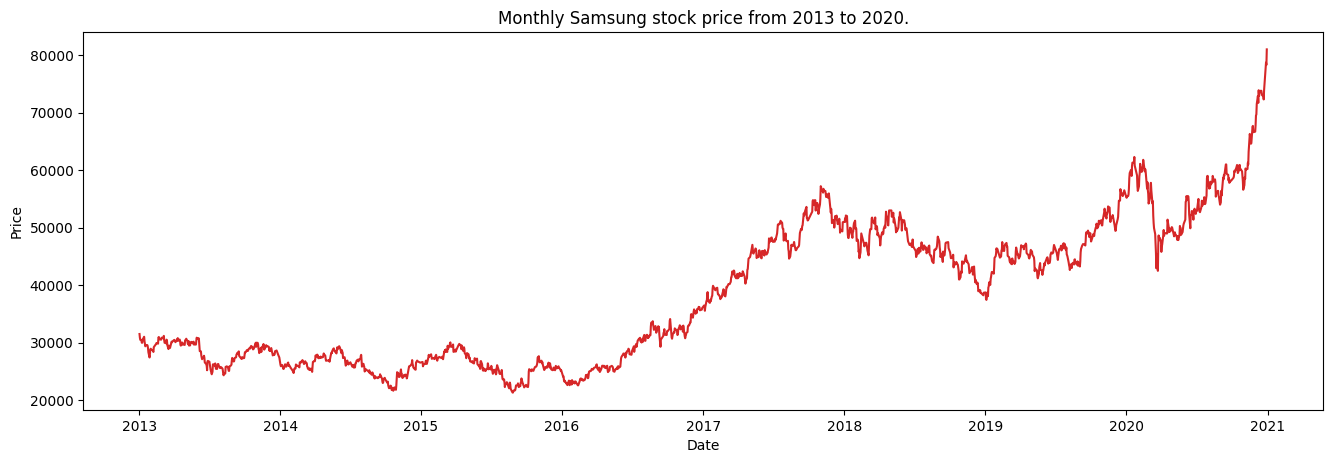

In [124]:
# 다시 준비된 데이터로 추이를 본다. 아래 그래프를 보면 시간이 흐름면서 측정값이 우상향하고 있다.

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Price', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(model_samsung, x=model_samsung.index, y=model_samsung['Close'], title='Monthly Samsung stock price from 2013 to 2020.')

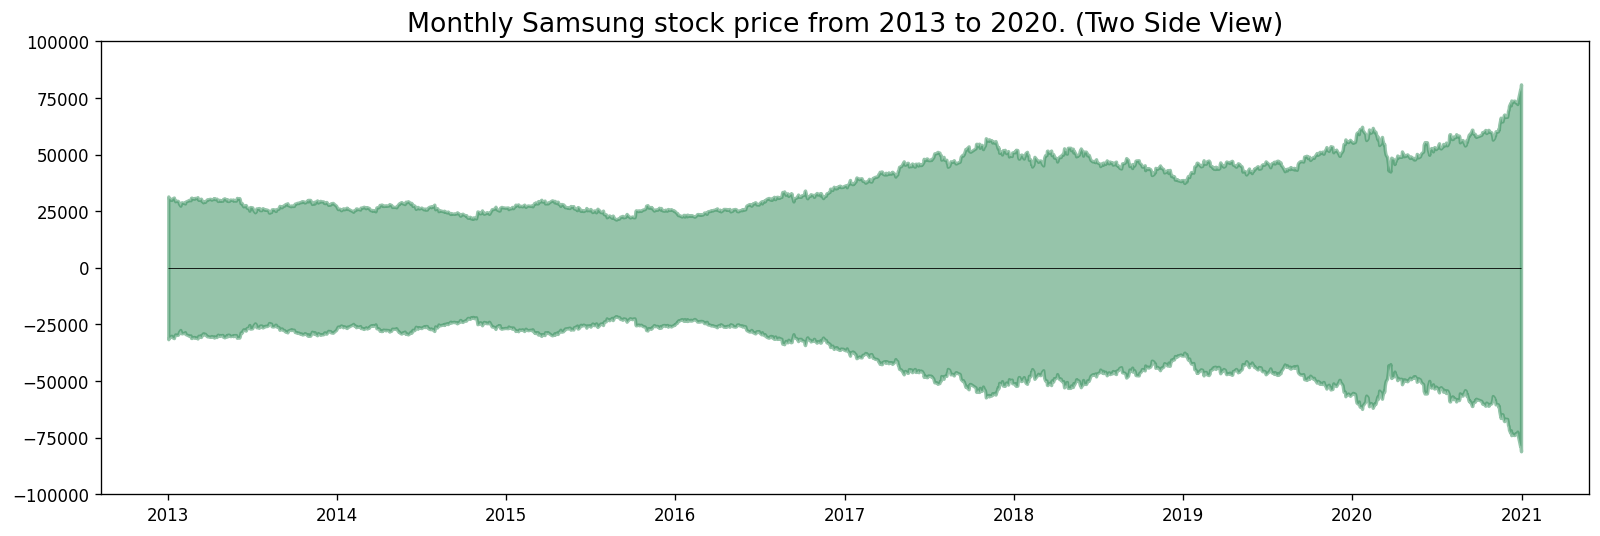

In [125]:
# 월 단위 시계열 데이터이고 반복적이라고 보이는 어려워보인다. 이렇게 하면 각 년도의 월별 데이터를 비교하기 용이하다.

x = model_samsung.index.values
y1 = model_samsung['Close'].values

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-100000, 100000)
plt.title('Monthly Samsung stock price from 2013 to 2020. (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(model_samsung.index.values), xmax=np.max(model_samsung.index.values), linewidth=.5)
plt.show()

In [126]:
#MS는인덱스는 해당 월의 마지막 일자로 표시를 시작일로 변경
#model_samsung1 = model_samsung['Close'].resample('MS').mean()

In [127]:
#인덱스 컬럼(date)를 데이터 컬럼으로 바꾸고 순번으로 인덱스 변경
#model_samsung1.reset_index(inplace=True)

In [128]:
model_samsung.reset_index(inplace=True)
model_samsung.rename(columns={'날짜': 'date', 
                           'Close': 'close'}, inplace=True)

In [129]:
import matplotlib as mpl

#date컬럼에서 년도, 월을 분리
model_samsung['year'] = [d.year for d in model_samsung['date']]
model_samsung['month'] = [d.strftime('%b') for d in model_samsung['date']]
model_samsung['y_m'] = [d.strftime('%y%m') for d in model_samsung['date']]
years = model_samsung['year'].unique()

In [130]:
result=model_samsung.groupby(['year','month'], as_index=False).mean()
years = result['year'].unique()

In [131]:
list=["19","18","17","16","15","14","13"]

df20=result[result['year']==2020]
df20.rename(columns={'year': 'year','month': 'month','close': '20close'}, inplace=True)

for i in list :
    df=result[result['year']==pd.to_numeric("20"+i)]
    df.rename(columns={'year': 'year','month': 'month','close': i+'close'}, inplace=True)
    df20 = pd.merge(df20, df, left_on="month", right_on='month', how='left')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is 

In [132]:
df20.drop(['year_x', 'year_y'], axis=1)
df20.fillna(df20['13close'].mean())

,year_x,month,20close,year_y,19close,year_x,18close,year_y,17close,year_x,16close,year_y,15close,year_x,14close,year_y,13close
0,2020,Apr,49075.000000,2019,46097.368421,2018,50324.210526,2017,41971.764706,2016,25607.368421,2015,28828.421053,2014,27524.000000,2013,30157.000000
1,2020,Aug,56980.000000,2019,43840.476190,2018,45947.727273,2017,46828.571429,2016,31956.190476,2015,22450.000000,2014,25229.000000,2013,25566.000000
2,2020,Dec,73410.000000,2019,53319.444444,2018,39881.250000,2017,50882.222222,2016,35498.947368,2015,25591.428571,2014,26124.210526,2013,28436.666667
3,2020,Feb,58957.894737,2019,46323.333333,2018,47182.352941,2017,38566.315789,2016,23331.764706,2015,27347.500000,2014,26010.000000,2013,29818.750000
4,2020,Jan,58616.666667,2019,41545.238095,2018,50051.428571,2017,37500.000000,2016,23173.684211,2015,26966.000000,2014,25965.263158,2013,29737.142857
5,2020,Jul,54880.952381,2019,46247.500000,2018,46257.894737,2017,49633.684211,2016,30023.157895,2015,24973.333333,2014,26646.000000,2013,25799.000000
6,2020,Jun,53038.095238,2019,44902.777778,2018,48469.444444,2017,46574.285714,2016,28056.000000,2015,25679.090909,2014,27387.777778,2013,27653.333333
7,2020,Mar,50168.181818,2019,44560.000000,2018,49707.000000,2017,41166.363636,2016,25022.000000,2015,29003.636364,2014,26000.000000,2013,30007.368421
8,2020,May,49113.888889,2019,43063.157895,2018,51039.473684,2017,45600.000000,2016,25570.000000,2015,26837.777778,2014,28170.000000,2013,30080.000000
9,2020,Nov,62926.315789,2019,52373.684211,2018,43530.000000,2017,55382.000000,2016,32503.000000,2015,26239.000000,2014,24304.444444,2013,29166.315789


In [102]:
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

In [103]:
df20=Sort_Dataframeby_Month(df=df20,monthcolumnname='month')

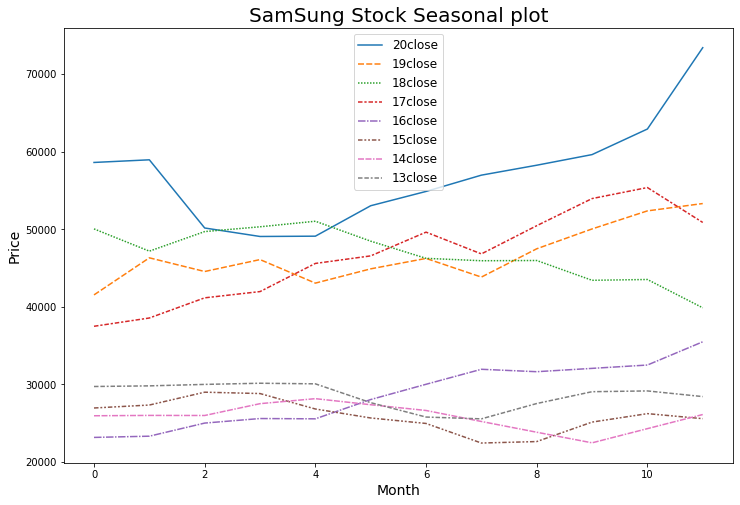

In [112]:
# 매년 특정 패턴이 반복된다는 느낌은 보이지 않는다.
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=df20[['20close', '19close', '18close', '17close', '16close', '15close', '14close', '13close']])

plt.title('SamSung Stock Seasonal plot', fontsize=20)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

In [105]:
# 각 연도별 라인의 색을 무작위로 지정
#np.random.seed(100)
#mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# 도표그리기
#plt.rcParams['font.family']='Malgun Gothic'
#plt.figure(figsize=(16,8), dpi= 120)
#for i, y in enumerate(years):
#    if i > 0:
#        plt.plot('month', 'close', data=result[result.year==y], color=mycolors[i], label=y)
#        plt.text(result[result.year==y].shape[0]-0.9, result.loc[result.year==y, 'close'][-1:].values[0], y, fontsize=12, color=mycolors[i])

 # 분칠하기
#plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='삼성전자주가', xlabel='월')
#plt.yticks(fontsize=12, alpha=.7)
#plt.title("계절별 삼성주가 분석", fontsize=20)
#plt.show()

In [107]:
result

,year,month,index,close
0,2013,Apr,65.5,30157.000000
1,2013,Aug,143.5,25566.000000
2,2013,Dec,217.5,28436.666667
3,2013,Feb,28.5,29818.750000
4,2013,Jan,10.0,29737.142857
...,...,...,...,...
91,2020,Mar,1646.5,50168.181818
92,2020,May,1684.5,49113.888889
93,2020,Nov,1802.0,62926.315789
94,2020,Oct,1784.0,59629.411765


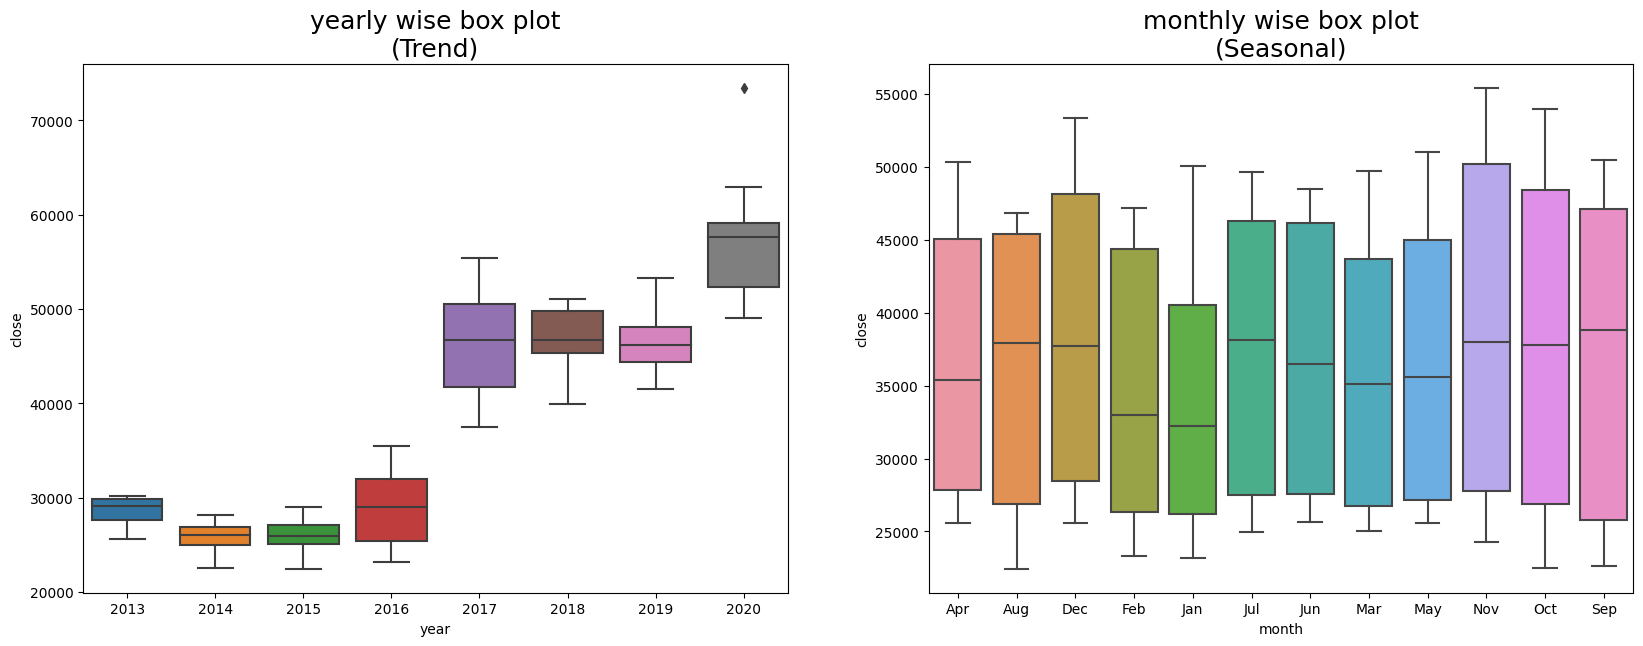

In [109]:
# 17년부터 급격한 상승이 있었고, 1월이 가장 낮고, 11월이 가장 높은 것으로 보여진다.

import seaborn as sns
# 도표 작성
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 100)
sns.boxplot(x='year', y='close', data=result, ax=axes[0])
sns.boxplot(x='month', y='close', data=result.loc[~result.year.isin([2013, 2020])], ax=axes[1])

 # 제목 설정
axes[0].set_title('yearly wise box plot\n(Trend)', fontsize=18)
axes[1].set_title('monthly wise box plot\n(Seasonal)', fontsize=18)
plt.show()

In [50]:
import plotly.graph_objects as go
import plotly.express as px

In [51]:
# 년도별 극좌표 비교시 18년 이후 11월에 대한 상승이 가장 높았던 것으로 보임
fig = px.line_polar(result, r="close", theta="month", color="year", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

AttributeError: ignored

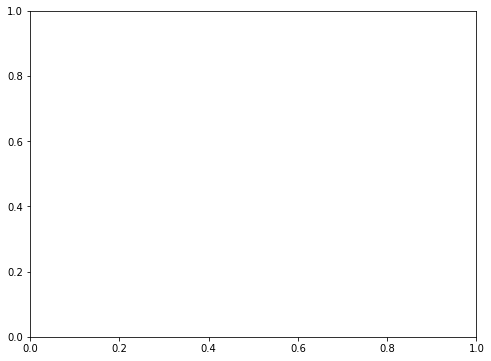

In [159]:
# subseries plot
#import statsmodels.api as sm
#from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
#from scipy import signal
#model_samsung1 = model_samsung.copy()
##필요없는 열 제거
#cols1 = ['year',	'month',	'y_m']
#model_samsung1.drop(cols1, axis=1, inplace=True)
#y1 = model_samsung1.set_index('date')
#fig, ax = plt.subplots(figsize=(8, 6))
#month_plot(y1['close'], ylabel='close');